Lid-driven Cavity Simulation using Lattice Boltzmann Method

In [4]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


maxIter = 50000 # total number of time iteration
nx, ny = 100, 100  # number of lattice nodes
cs = sqrt(1/3)
nulb = 0.01 # viscoscity in lattice unites
tau = 0.5 + nulb/cs**2
rho0 = 5
u0 = 0.1
Re = (u0 * ny)/nulb
fin = zeros((9, nx, ny))

            #0     1       2
v = array([[1,1], [1,0], [1,-1], #3      4      5
                                [0,1], [0,0], [0,-1],  #6      7       8
                                                     [-1,1], [-1,0], [-1,-1]])

t = array([[1/36], [1/9], [1/36],
                                 [1/9], [4/9], [1/9],
                                                     [1/36], [1/9], [1/36]])


### Function Definitions #####################################################

def solid(nx, ny):
  solid = zeros((nx, ny), dtype=bool)
  solid[:, 0] = True
  solid[-1, :] = True
  solid[0, :] = True
  return solid

def macroscopic(fin):
    rho = sum(fin, axis = 0)
    u = zeros((2, nx, ny))
    for i in range(9):
        u[0, :, :] += v[i, 0] * fin[i, :, :]
        u[1, :, :] += v[i, 1] * fin[i, :, :]
    u /= rho
    return rho, u


def equilibrium(rho, u):
    usqr = (3/2) * (u[0]**2 + u[1]**2)
    feq = zeros((9, nx, ny))
    for i in range(9):
        uv = 3* (v[i, 0] * u[0,: ,:] + v[i, 1] * u[1, :, :])
        feq[i, :, :] = rho * t[i] *(1 + uv + 0.5* uv**2 - usqr)
    return feq

### Setup ##############################################################

solid = solid(nx, ny)
for i in range(9):
    fin[i,:,:] = t[i]*rho0
rho = ones((nx, ny))*rho0
u = ones((2,nx, ny))*0
### Main Time Loop ###########################################################
x = arange(0, nx, 1)
y = arange(0, ny, 1)
X, Y = meshgrid(x, y)
print(f'Re={Re}')
for time in range(maxIter + 1):
    rho, u = macroscopic(fin)
    u[0,:,-1] = u0
    # compute equibliruim
    feq = equilibrium(rho, u)
    # collision step
    fout = fin - (fin - feq)/tau

    for i in range(9):
        #Streaming step
        fin[i, :, :] = roll(roll(fout[i,:,:], v[i,0], axis = 0), v[i, 1], axis = 1)
        # bounce-back condition
        fin[i, solid] = fout[8 - i , solid]
        # Moving-wall boundary condition
        fin[i,:,-1] = fout[8-i,:,-1] - 6*rho[:,-1]*t[8-i]*v[8-i, 0]*u0

Re=1000.0


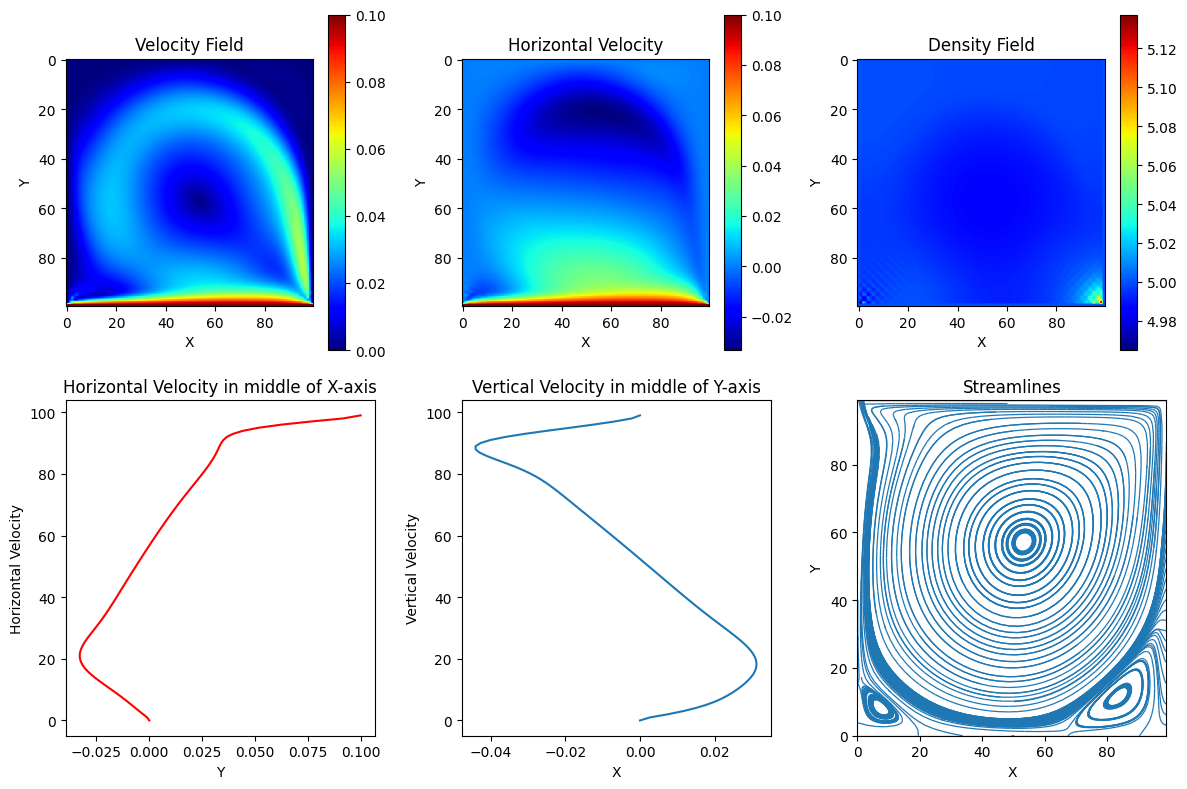

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].set_title('Velocity Field')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
imgplot1 = axs[0, 0].imshow(sqrt(u[0]**2 + u[1]**2).T, cmap='jet')
fig.colorbar(imgplot1, ax=axs[0, 0])
axs[0, 1].set_title('Horizontal Velocity')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
imgplot2 = axs[0, 1].imshow((u[0]).T, cmap='jet')
fig.colorbar(imgplot2, ax=axs[0, 1])
axs[0, 2].set_title('Density Field')
axs[0, 2].set_xlabel('X')
axs[0, 2].set_ylabel('Y')
imgplot3 = axs[0, 2].imshow(rho.T, cmap='jet')
fig.colorbar(imgplot3, ax=axs[0, 2])
axs[1, 0].set_title('Horizontal Velocity in middle of X-axis')
axs[1, 0].set_xlabel('Y')
axs[1, 0].set_ylabel('Horizontal Velocity')
axs[1, 0].plot(u[0,50,:], list(range(0,100)), color='red')
axs[1, 1].set_title('Vertical Velocity in middle of Y-axis')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Vertical Velocity')
axs[1, 1].plot(u[1,:,50], list(range(0,100)))
axs[1, 2].set_title('Streamlines')
axs[1, 2].set_xlabel('X')
axs[1, 2].set_ylabel('Y')
axs[1, 2].streamplot(X, Y, u[0,:,:].T, u[1,:,:].T, density=1.1, arrowstyle='-', broken_streamlines=False, linewidth=0.9)
plt.tight_layout()
plt.show()